### Ch9 Figure1

In [1]:
# According to this study of 36,000 workers, those who reported taking several ten-minute breaks were 41% more likely to develop cancer over the next five years. Those who didn’t take these breaks were much healthier.

data = []

for i in range(36000):
    
    if rd.random() <= .05:
        breaks = rd.choice([3,4,5])
    else:
#         breaks = rd.randint(0,2)
        breaks = 2
    if breaks >= 3:
        if rd.random() >= .41:
            if rd.random() >= .35:
                cancer = 'Y'
            else:
                cancer = 'N'
        else:
            if rd.random() <= .2:
                cancer = 'N'
            else:
                cancer = 'Y'
    else:
        if rd.random()>=.48:
            cancer = 'Y'
        else:
            cancer = 'N'
    data.append([i, breaks, cancer])

df = pd.DataFrame(data, columns = ['id', 'breaks-per-day', 'has-cancer'])
# df.to_csv('csv_output/ch9_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch9_fig1.csv')
df.head()        

,id,breaks-per-day,has-cancer
0,0,2,Y
1,1,2,Y
2,2,2,Y
3,3,2,N
4,4,2,Y


For people who take 3 or more breaks per day, they are 43.75% more likely to have cancer versus those who take 2 or less is only 4.60% but represent 95.09% of population


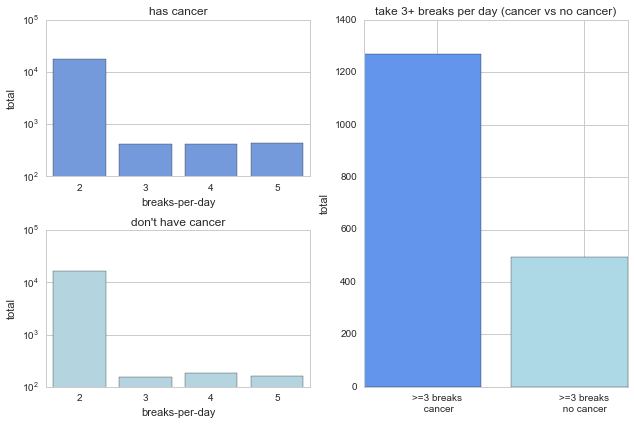

In [2]:
df = pd.read_csv('csv_output/ch9_fig1.csv')

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(2,2, figsize=(9,6))
ax1 = plt.subplot2grid((2,2),(0,1), rowspan=2)

ds = df.groupby(['has-cancer', 'breaks-per-day']).id.count()
ds1 = ds['Y'].reset_index()
ds2 = ds['N'].reset_index()

g = sns.barplot(x='breaks-per-day', y='id', data=ds1, ax=ax[0][0], color='cornflowerblue');
g2 = sns.barplot(x='breaks-per-day', y='id', data=ds2, ax=ax[1][0], color='lightblue');
g.figure.get_axes()[0].set_yscale('log')
g2.figure.get_axes()[1].set_yscale('log')

ax1.bar(left=0, height=ds1[ds1['breaks-per-day']>=3].id.sum(), color='cornflowerblue')
ax1.bar(left=1, height=ds2[ds2['breaks-per-day']>=3].id.sum(), color='lightblue')

# ax1.bar(left=0, height=ds1[ds1['breaks-per-day']<3].id.sum(), color='cornflowerblue')
# ax1.bar(left=1, height=ds2[ds2['breaks-per-day']<3].id.sum(), color='lightblue')

ax[0][0].set_ylabel('total')
ax[1][0].set_ylabel('total')
ax1.set_ylabel('total')

ax[0][0].set_title('has cancer')
ax[1][0].set_title('don\'t have cancer')
ax1.set_title('take 3+ breaks per day (cancer vs no cancer)')

ax1.set_xticks([0.5,1.5])
ax1.set_xticklabels(['>=3 breaks\n cancer', '>=3 breaks\n no cancer'])

x=ds1[ds1['breaks-per-day']>=3].id.sum()
y=ds2[ds2['breaks-per-day']>=3].id.sum()
r1 = (x/(x+y)) - (y/(x+y))
x=ds1[ds1['breaks-per-day']<3].id.sum()
y=ds2[ds2['breaks-per-day']<3].id.sum()
r2 = (x/(x+y)) - (y/(x+y))

r3 = (x+y)/36000


print ('For people who take 3 or more breaks per day, they are %.2f%% more likely to have cancer versus those who take 2 or less is only %.2f%% but represent %.2f%% of population' %(r1*100, r2*100, r3*100))

f.tight_layout()
f.savefig('svg_output/ch9_fig1.svg', format='svg')

Most of the people take 2 ten-minute breaks per day, but if we only look at those that take 3 or more breaks per day, they are indeed about 43% more likely to have cancer. However, 95.1% of people only take 2 breaks per day.

In [3]:
%load_ext rpy2.ipython

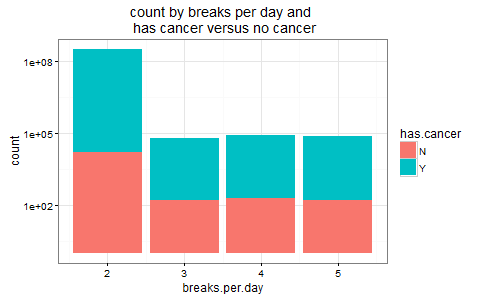

In [4]:
%%R -w 480 -h 300 -u px
require(dplyr)
df = read.csv('csv_output/ch9_fig1.csv')
dgb = df %>% group_by(breaks.per.day, has.cancer)
df2 = summarize(dgb, count=n())

require(ggplot2)
ggplot(df2, aes(x=breaks.per.day, y=count, fill=has.cancer)) + geom_bar(stat = "identity") + scale_y_log10() + ggtitle('count by breaks per day and \n has cancer versus no cancer') + theme_bw()
# ggsave("svg_output/ch9_fig1_R.svg")